## Introduction + Library

We started our project by determing the objectives. We understand that Churn means losing customers and therefore high churns hurts profits while low churn boosts them significantly. This is why, with the data provided, we forecasted which customers might leave and the reason why this is. Our main objectives were to create a model to forecast churn.

For this project, the code is written and analyzed in python through the Google Colab editor.

There are four different sections in the library: tools for data analysis, preparing the data, making data ready for analytics, and building our analysis tools.

The first section is the tool section. This can be seen below.

In [ ]:
import numpy as np
## Numpy is used for dealing with numerical operations.
import pandas as pd
## Pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt
## Matplotlib is used for creating charts and graphs to be able to see data trends.

The next section was for preparing the data.

In [ ]:
from sklearn.impute import SimpleImputer
## Sklearn.impute fills in missing blanks in the data sheet.
from scipy import stats
## Scipy.stat was used to help idenity and clean unusual data points.

The next section contains the tools we used to make the data ready for analysis.

In [ ]:
from sklearn import preprocessing
## Sklearn.preprocessing was used to adjust the data to a common scale.
from sklearn.model_selection import train_test_split
## The train test split was used to divide the data so that we could test our analysis tools.
from sklearn import metrics
## We used metrics to provide us with the tools to measure the accuracy of the predicted models.

The last section of the library was our analysis tools.

In [ ]:
from sklearn import linear_model
## We used the sklearn to help us with the linear model.
from sklearn.ensemble import RandomForestClassifier
## We used the sklearn.ensemble to run the Random Forest Model.

After loading in the libraries, we needed to import our data. In order to do that, we needed to mount our Google Drive because that is where the data was. The link to the data is [here](https://drive.google.com/file/d/1gyLBGml1NNhdYmKFYDeIy_INT3e_52Vc/view?usp=sharing). This needs to be imported into your google drive for the Colab to work.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


To start we wanted to see the whole data set in Colab so it is shown below.

In [ ]:
data = pd .read_csv('Aquinas Customer Churn Data 2024 V2.csv')

# Data Cleaning

The first part of cleaning the data was getting rid of all of the spots filled wth '-'. The '-' were place holders for unknowns and for the code to work, all of the cells needed to be empty. This was changed in the Excel sheet.

It was also found that the code would not work if therewere '$' or ',' in the entry.
In the Excel file all of the columns with those entries were changed into Numbers as they were all considered "Accounting." While changing them to numbers, the commas were also removed. Once this was fixed, the file was uploaded to Colab.

## Data Types

It was then found that all of the data types needed to be changed fromobjects to float. The data types can be seen below.

In [ ]:
data.dtypes

Customer Key                    int64
MaintenanceAgreementCount       int64
ContractRevenue                object
MainEquipmentCount             object
PartsCost                      object
BacklineCost                   object
TotalLaborTime                 object
TotalTravelTime                object
TotalLaborCost                 object
TotalTravelCost                object
TotalServiceCalls              object
TotalServiceCallEscalations     int64
Tenure                          int64
Churned                         int64
dtype: object

To start this process all of the different symbols or numbers with blank spaces needed to be changed.This process was done for every column.

In [ ]:
data['ContractRevenue'] = data['ContractRevenue'].str.replace('$','')
data['ContractRevenue'] = data['ContractRevenue'].str.replace(',','')
data['ContractRevenue'] = data['ContractRevenue'].replace(r'^\s*$', np.nan, regex=True)
data['ContractRevenue'] = pd.to_numeric(data['ContractRevenue'])
data['MainEquipmentCount'] = data['MainEquipmentCount'].str.replace(',','')
data['MainEquipmentCount'] = data['MainEquipmentCount'].replace(r'^\s*$', np.nan, regex=True)
data['MainEquipmentCount'] = pd.to_numeric(data['MainEquipmentCount'])
data['PartsCost'] = data['PartsCost'].str.replace(',','')
data['PartsCost'] = data['PartsCost'].replace(r'^\s*$', np.nan, regex = True)
data['PartsCost'] = pd.to_numeric(data['PartsCost'])
data['BacklineCost']=data['BacklineCost'].str.replace(',','')
data['BacklineCost'] = data['BacklineCost'].str.replace('[$,,,]','')
data['BacklineCost'] = data['BacklineCost'].replace(r'\s*$', np.nan, regex=True)
data['BacklineCost']=pd.to_numeric(data['BacklineCost'])
data['TotalLaborTime']=data['TotalLaborTime'].str.replace(',','')
data['TotalLaborTime']=pd.to_numeric(data['TotalLaborTime'])
data['TotalTravelTime']=data['TotalTravelTime'].str.replace(',','')
data['TotalTravelTime']=pd.to_numeric(data['TotalTravelTime'])
data['TotalLaborCost'] = data['TotalLaborCost'].astype(str)
data['TotalLaborCost'] = data['TotalLaborCost'].str.replace('[$,,,)]','')
data['TotalLaborCost'] = data['TotalLaborCost'].replace(r'^\s*$-', np.nan, regex = True)
data['TotalLaborCost'] = pd.to_numeric(data['TotalLaborCost'], errors='coerce')
data['TotalTravelCost'] = data['TotalTravelCost'].astype(str)
data['TotalTravelCost'] = data['TotalTravelCost'].str.replace('[$,()]', '', regex=True)
data['TotalTravelCost'] = data['TotalTravelCost'].str.replace('[$,,,)]','')
data['TotalTravelCost'] = pd.to_numeric(data['TotalTravelCost'], errors='coerce')
data['TotalServiceCalls'] = data['TotalServiceCalls'].astype(str)
data['TotalServiceCalls'] = data['TotalServiceCalls'].str.replace('[$,()]', '', regex=True)
data['TotalServiceCalls'] = pd.to_numeric(data['TotalServiceCalls'], errors='coerce')

The chart below confirms all of the datatypes were turned into floats and therefore we can start cleaning the data.

In [ ]:
data.dtypes

Customer Key                     int64
MaintenanceAgreementCount        int64
ContractRevenue                float64
MainEquipmentCount             float64
PartsCost                      float64
BacklineCost                   float64
TotalLaborTime                 float64
TotalTravelTime                float64
TotalLaborCost                 float64
TotalTravelCost                float64
TotalServiceCalls              float64
TotalServiceCallEscalations      int64
Tenure                           int64
Churned                          int64
dtype: object

##  NANs

After changing the data types the next part of cleaning was  handling NANs. Below is the breakdown, by column, of how many NANs there are. The total number is 8,763.

In [ ]:
data.isnull().sum()

Customer Key                       0
MaintenanceAgreementCount          0
ContractRevenue                 2515
MainEquipmentCount              2519
PartsCost                       7626
BacklineCost                   12364
TotalLaborTime                     0
TotalTravelTime                    0
TotalLaborCost                  6638
TotalTravelCost                 5657
TotalServiceCalls               3891
TotalServiceCallEscalations        0
Tenure                             0
Churned                            0
dtype: int64

To clean up the NANs they were imputed with the median. This was decided because when imputing with the mean for ContractRevenue, we were given a number that wasn't very close to other values in the column and would eventually throw off the accuracy of our model. This makes sense because the median is less sensitive to outliers than the mean is. The median strategy gave us the numbers for all columns that were roughly close enough to the other values and then we were able to have a pretty high accuracy in our models.

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data[['MainEquipmentCount']])
data['MainEquipmentCount'] = imputer.transform(data[['MainEquipmentCount']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data[['PartsCost']])
data['PartsCost'] = imputer.transform(data[['PartsCost']])

imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
imputer = imputer.fit(data[['ContractRevenue']])
data['ContractRevenue'] = imputer.transform(data[['ContractRevenue']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data[['TotalLaborCost']])
data['TotalLaborCost'] = imputer.transform(data[['TotalLaborCost']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data[['TotalTravelCost']])
data['TotalTravelCost'] = imputer.transform(data[['TotalTravelCost']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data[['TotalServiceCalls']])
data['TotalServiceCalls'] = imputer.transform(data[['TotalServiceCalls']])

When we were writing the imputing codes, we came across something weird with BacklineCosts. If we tried to impute using the median, none of the NANs would disappear. That's when we found out we had to go from median-mean-median then the NANs would be resolved.

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data[['BacklineCost']])
data['BacklineCost'] = imputer.transform(data[['BacklineCost']])

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['BacklineCost']])
data['BacklineCost'] = imputer.transform(data[['BacklineCost']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data[['BacklineCost']])
data['BacklineCost'] = imputer.transform(data[['BacklineCost']])

The table below shows that all of the NANs are gone. This part of the cleaning is now completed.

In [ ]:
data.isnull().sum()

Customer Key                   0
MaintenanceAgreementCount      0
ContractRevenue                0
MainEquipmentCount             0
PartsCost                      0
BacklineCost                   0
TotalLaborTime                 0
TotalTravelTime                0
TotalLaborCost                 0
TotalTravelCost                0
TotalServiceCalls              0
TotalServiceCallEscalations    0
Tenure                         0
Churned                        0
dtype: int64

## Outliers

The last part of cleaning was fixing the outliers. There were two way that we decided to fix the outliers. The first one can be seen in the code line below. The scaling is done by MinMaxScaler. This function is important because it adjusts each column separately to make sure the values fall within a minimum and maximum. This normalizes the values by subtracting the minimum value from each entry and then divide by the range.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
data['ContractRevenue'] = min_max_scaler.fit_transform(data[['ContractRevenue']])
min_max_scaler = preprocessing.MinMaxScaler()
data['MainEquipmentCount'] = min_max_scaler.fit_transform(data[['MainEquipmentCount']])
min_max_scaler = preprocessing.MinMaxScaler()
data['PartsCost'] = min_max_scaler.fit_transform(data[['PartsCost']])

Since those columns have no more outliers, we moved on to the next ones. The BacklineCost column had no more outliers because there were so many NANs which meant that the inputs were already imputed to the mean and median.

The TotalLaborTime and TotalTravelTime columns were imputed using the Z score. A Z score is a measurement of the relationship between a specific value and the mean of that column. If the Z score was larger than 3 then the numbers were imputed to the median. A histogram was made for each of the columns to be able to visualize the outliers.

array([[<Axes: title={'center': 'TotalLaborTime'}>]], dtype=object)

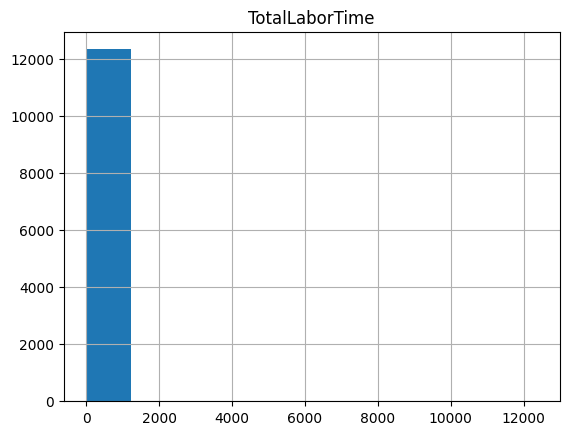

In [ ]:
data.hist(column='TotalLaborTime')

In [ ]:
z = stats.zscore(data['TotalLaborTime'])

In [ ]:
z

0       -0.063884
1       -0.097723
2       -0.157880
3       -0.137827
4       -0.157880
           ...   
12359   -0.124041
12360    0.189027
12361   -0.157880
12362   -0.157880
12363   -0.157880
Name: TotalLaborTime, Length: 12364, dtype: float64

In [ ]:
outliers = data[z>3]

In [ ]:
data.loc[z>3, 'TotalLaborTime'] = data['TotalLaborTime'].median()

array([[<Axes: title={'center': 'TotalTravelTime'}>]], dtype=object)

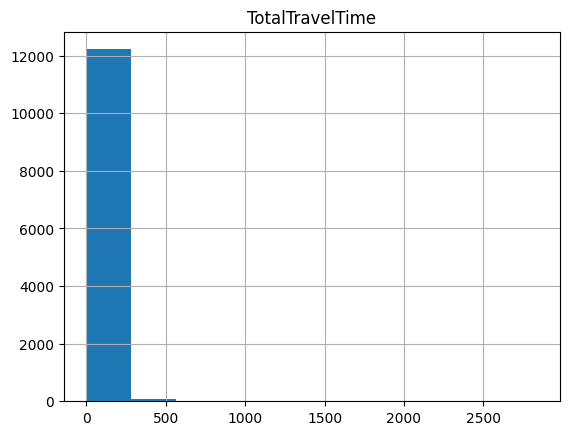

In [ ]:
data.hist(column = 'TotalTravelTime')

In [ ]:
z = stats.zscore(data['TotalTravelTime'])

In [ ]:
z

0       -0.202889
1       -0.152133
2       -0.221589
3       -0.221589
4       -0.221589
           ...   
12359   -0.221589
12360    0.541890
12361   -0.221589
12362   -0.221589
12363   -0.221589
Name: TotalTravelTime, Length: 12364, dtype: float64

In [ ]:
outliers = data[z>3]

In [ ]:
data.loc[z>3, 'TotalTravelTime'] = data['TotalTravelTime'].median()

The outliers in the last three columns were rescaled and then the Z score was used to find the outliers and those values were then imputed to the median.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
data['TotalLaborCost'] = min_max_scaler.fit_transform(data[['TotalLaborCost']])
min_max_scaler = preprocessing.MinMaxScaler()
data['TotalTravelCost'] = min_max_scaler.fit_transform(data[['TotalTravelCost']])
min_max_scaler = preprocessing.MinMaxScaler()
data['TotalServiceCalls'] = min_max_scaler.fit_transform(data[['TotalServiceCalls']])

array([[<Axes: title={'center': 'TotalLaborCost'}>]], dtype=object)

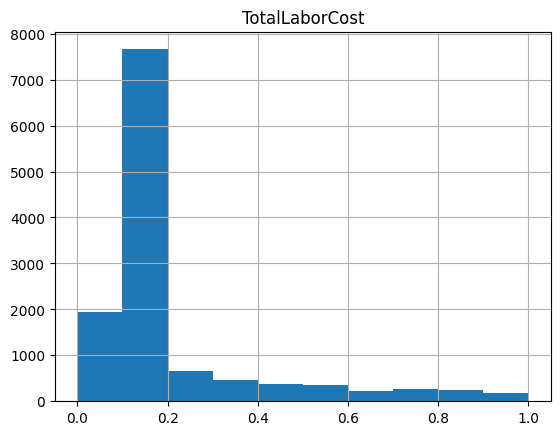

In [ ]:
data.hist(column='TotalLaborCost')

In [ ]:
z_scores = stats.zscore(data['TotalLaborCost'].dropna())

In [ ]:
median_labor_cost = data['TotalLaborCost'].median()

In [ ]:
data.loc[z_scores > 3, 'TotalLaborCost'] = median_labor_cost

In [ ]:
data.loc[z_scores > 3, 'TotalLaborCost'] = data ['TotalLaborCost'].median()

array([[<Axes: title={'center': 'TotalTravelCost'}>]], dtype=object)

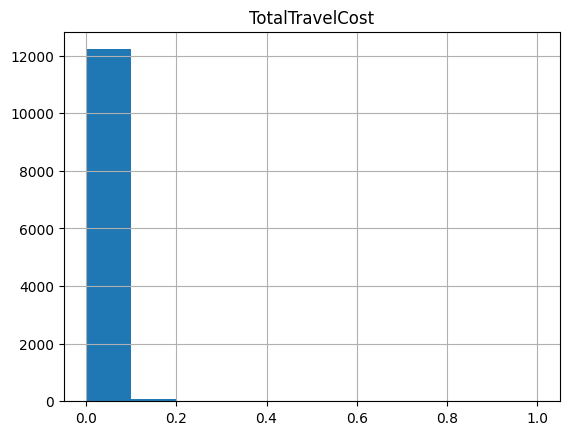

In [ ]:
data.hist(column='TotalTravelCost')

In [ ]:
z_scores = stats.zscore(data['TotalTravelCost'].dropna())

In [ ]:
median_travel_cost = data['TotalTravelCost'].median()

In [ ]:
data.loc[z_scores > 3, 'TotalTravelCost'] = median_travel_cost

In [ ]:
data.loc[z_scores > 3, 'TotalTravelCost'] = data['TotalTravelCost'].median()

array([[<Axes: title={'center': 'TotalServiceCalls'}>]], dtype=object)

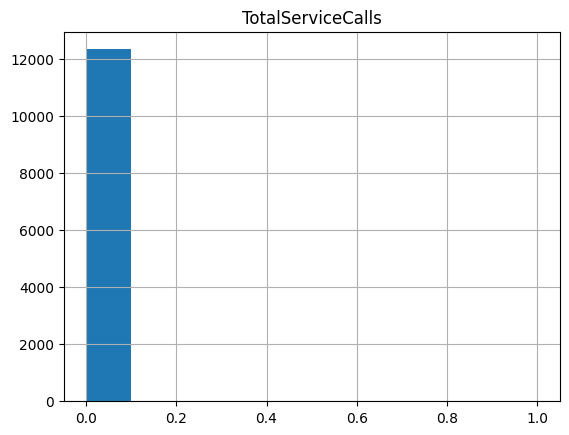

In [ ]:
data.hist(column='TotalServiceCalls')

In [ ]:
z_scores = stats.zscore(data['TotalServiceCalls'].dropna())

In [ ]:
median_service_calls = data['TotalServiceCalls'].median()

In [ ]:
data.loc[z_scores > 3, 'TotalServiceCalls'] = median_service_calls

In [ ]:
data.loc[z_scores > 3, 'TotalServiceCalls'] = data['TotalServiceCalls'].median()

This is what the data set looks like before there has been any modeling done.

In [ ]:
data

,Customer Key,MaintenanceAgreementCount,ContractRevenue,MainEquipmentCount,PartsCost,BacklineCost,TotalLaborTime,TotalTravelTime,TotalLaborCost,TotalTravelCost,TotalServiceCalls,TotalServiceCallEscalations,Tenure,Churned
0,26497,37,0.001929,0.004259,0.006778,4.792453e-310,18.75,1.75,0.197282,0.000613,0.001073,0,36,0
1,26503,36,0.001412,0.001545,0.000514,4.792453e-310,12.00,6.50,0.599899,0.002287,0.000501,0,36,0
2,26511,11,0.000100,0.000175,0.000794,4.792453e-310,0.00,0.00,0.197282,0.003168,0.000572,0,12,1
3,26519,24,0.000267,0.000158,0.000253,4.792453e-310,4.00,0.00,0.197282,0.003168,0.000286,0,24,1
4,26545,12,0.000096,0.000158,0.000794,4.792453e-310,0.00,0.00,0.197282,0.003168,0.000572,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12359,18244,75,0.001270,0.000867,0.000794,4.792453e-310,6.75,0.00,0.335682,0.003168,0.001717,0,58,1
12360,18245,110,0.018844,0.006688,0.009290,4.792453e-310,69.20,71.45,0.197282,0.025178,0.004151,0,118,0
12361,18252,42,0.001270,0.000867,0.000794,4.792453e-310,0.00,0.00,0.197282,0.003168,0.000000,0,42,1
12362,18254,32,0.001270,0.000867,0.000794,4.792453e-310,0.00,0.00,0.197282,0.003168,0.000572,0,32,1


Now that the data set is clean, we can now run the models. We chose to run two models: a logistic model and a random forest model.

# Logistic Model

The first model we decided to build to test this data was a Logistic Regression model. This model works best with binary classification and the outcome variable being categorical.

In [ ]:
df = data.values

In [ ]:
X_mult = df[:,0:13]
y = df[:,13]

In [ ]:
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult, y, test_size=0.3, random_state = 0)

We first split the data into X_mult and Y values. Since we will be predicting using multiple different varaibles we needed to used the multiple variable option for the X values. The feature variables are the inputs and the response variable is the output. The output is the churned column, which is why it is separated from the inputs. We then took the X and Y values to perform the train test split using a 0.3 test size. We went back and added the random state code so that our model would have the same accuracy percentage. This stops the code from running through different random numbers and always stays with the same generated numbers.

In [ ]:
logrmult = linear_model.LogisticRegression(max_iter = 1000)
logrmult.fit(X_mult_train, y_mult_train)

LogisticRegression(max_iter=1000)

Once our data was successfully split, we could begin the process of building our logistic model. We decided to do 1,000 iterations because we felt like that would be enough for our model to assess the data.

In [ ]:
predictions = logrmult.predict(X_mult_test)

Once our logistic model was created, we were able to generate the predictions found from the model. This can be seen below with the array showing 0 or 1.

In [ ]:
predictions

array([0., 1., 0., ..., 1., 1., 0.])

In [ ]:
errors = abs(predictions - y_mult_test)

After we found the predictions, we generated what errors were made in our model by the code above. Once we found the errors then we could determine what the accuracy rate of our model was. Which we found out to be 79.27% and an inaccuracy of 20.73%. This model would work well to be able to help determine if new customers are likely to churn or not based on their given information.

In [ ]:
np.mean(errors == 0)

0.7927223719676549

In [ ]:
np.mean(errors == 1)

0.207277628032345

In [ ]:
X_mult_test[predictions==1]

array([[2.13170000e+04, 6.40000000e+01, 4.07611163e-03, ...,
        6.44053242e-04, 0.00000000e+00, 6.40000000e+01],
       [2.35310000e+04, 5.00000000e+00, 4.23546849e-04, ...,
        2.86245885e-04, 0.00000000e+00, 6.00000000e+00],
       [2.13770000e+04, 1.20000000e+01, 1.26997151e-03, ...,
        5.72491770e-04, 0.00000000e+00, 1.20000000e+01],
       ...,
       [1.03660000e+04, 1.00000000e+01, 1.26997151e-03, ...,
        1.00186060e-03, 0.00000000e+00, 1.23000000e+02],
       [2.53420000e+04, 5.00000000e+01, 1.40866203e-03, ...,
        1.86059825e-03, 0.00000000e+00, 4.00000000e+01],
       [2.11040000e+04, 4.90000000e+01, 1.46467839e-03, ...,
        7.15614713e-05, 0.00000000e+00, 5.00000000e+01]])

In [ ]:
predictions = list(predictions)
actuals = list(y_mult_test)

In [ ]:
actual = actuals
predicted = predictions

In [ ]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [ ]:
confusion_matrix

array([[1598,  295],
       [ 474, 1343]])

After the model was created, we decided to add in a confusion matrix to show how well our model worked. We knew the accuracy but creating this confusion matrix helps visualize the outcome easier. Above there is the array which shows the confusion matrix.

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not Churn', 'Churn'])

The array shows the confusion well but below is a bigger picture to understand what is happening. This shows how well our model was able to predict churn or not churn. For example, our model predicted that customers would not churn but actually did churn 474 times but then predicted customers would not churn and didn't churn 1598 times. Which shows our model still has errors but has a high accuracy rate.

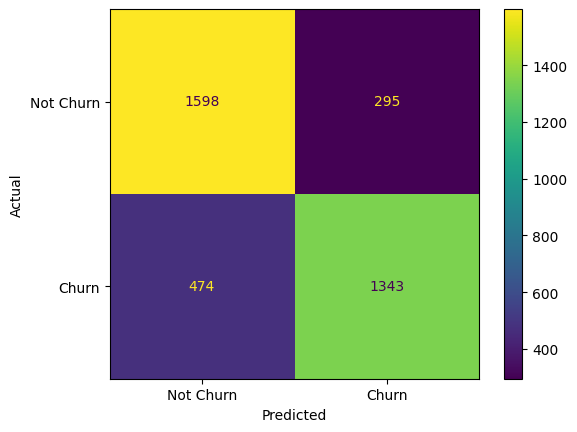

In [ ]:
cm_display.plot()
cm_display.ax_.set(xlabel='Predicted', ylabel='Actual')
plt.show()

# Random Forest Model

The next model we chose to do was a random forest model. We chose this model because it can handle large data sets with many features. Our data set included thousands of rows with 13 columns so we thought our data set fit these qualifications.

To start the model, a copy of the cleaned data set was made.

In [ ]:
data3 = data.copy(deep = True)

The formatting of the table will mess up this model so the data was extracted from the formatting. This left the data in an array. This can be seen below.

In [ ]:
data3 = data3.values

In [ ]:
data3

array([[2.64970000e+04, 3.70000000e+01, 1.92940340e-03, ...,
        0.00000000e+00, 3.60000000e+01, 0.00000000e+00],
       [2.65030000e+04, 3.60000000e+01, 1.41164723e-03, ...,
        0.00000000e+00, 3.60000000e+01, 0.00000000e+00],
       [2.65110000e+04, 1.10000000e+01, 9.99496812e-05, ...,
        0.00000000e+00, 1.20000000e+01, 1.00000000e+00],
       ...,
       [1.82520000e+04, 4.20000000e+01, 1.26997151e-03, ...,
        0.00000000e+00, 4.20000000e+01, 1.00000000e+00],
       [1.82540000e+04, 3.20000000e+01, 1.26997151e-03, ...,
        0.00000000e+00, 3.20000000e+01, 1.00000000e+00],
       [1.82600000e+04, 8.00000000e+00, 1.26997151e-03, ...,
        0.00000000e+00, 9.00000000e+00, 1.00000000e+00]])

The columns were then separated into X and Y. The actual customer churn column was the Y, as it is the output. All other columns were separated into X.

In [ ]:
X = data3[:,0:13]

In [ ]:
Y = data3[:,13]

To train the data, so that the model is more accurate, we performed a train test split. The test size was 0.3.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

The work for this model is done by the Random Forest Classifier. The data was then fit using the training data.

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf = rf.fit(X_train, Y_train)

The model is then run using the test data.

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
predictions

array([0., 0., 0., ..., 0., 1., 0.])

Below is the code to find the average absolute error.

In [ ]:
errors = abs(predictions - Y_test)

In [ ]:
errors

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
np.mean(errors ==0)

0.8913746630727762

In [ ]:
np.mean(errors == 1)

0.10862533692722372

The model was correct in predicting churn 89.19% of the time. Thus, it was innacurate 10.81% of the time.

The confusion matrix bellow is a way to visualize the predictions for the Random Forest model. The X axis is what was predicted and the Y axis is what actually happened. On each axis there is a display label for if the customer churned or did not.

In [ ]:
X_test[predictions ==1 ]

array([[1.25360000e+04, 1.07000000e+02, 5.44508809e-03, ...,
        1.57435237e-02, 2.00000000e+00, 1.12000000e+02],
       [2.13770000e+04, 1.20000000e+01, 1.26997151e-03, ...,
        5.72491770e-04, 0.00000000e+00, 1.20000000e+01],
       [9.36300000e+03, 8.40000000e+01, 1.26994693e-02, ...,
        7.44239302e-03, 0.00000000e+00, 1.45000000e+02],
       ...,
       [4.94600000e+03, 6.00000000e+00, 1.26997151e-03, ...,
        5.72491770e-04, 0.00000000e+00, 1.40000000e+01],
       [1.03660000e+04, 1.00000000e+01, 1.26997151e-03, ...,
        1.00186060e-03, 0.00000000e+00, 1.23000000e+02],
       [2.11040000e+04, 4.90000000e+01, 1.46467839e-03, ...,
        7.15614713e-05, 0.00000000e+00, 5.00000000e+01]])

In [ ]:
predictions = list(predictions)
actuals = list(Y_test)

In [ ]:
actual = actuals
predicted = predictions

In [ ]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [ ]:
confusion_matrix

array([[1720,  173],
       [ 230, 1587]])

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = ['Not Churn', 'Churn'])

Below is the Confusion Matrix. The number on the top left, 1707, is the number of customers that were correctly predicted to not churn. The number on the top right, 201, is the number that was predicted to churn, but did not actually churn. The number on the bottom right, 1603, is the number of customers that were predicted to churn and did actually churn. Lastly, the number on the bottom left, 199, is the number of customers that were predicted to not churn, but actually did churn.

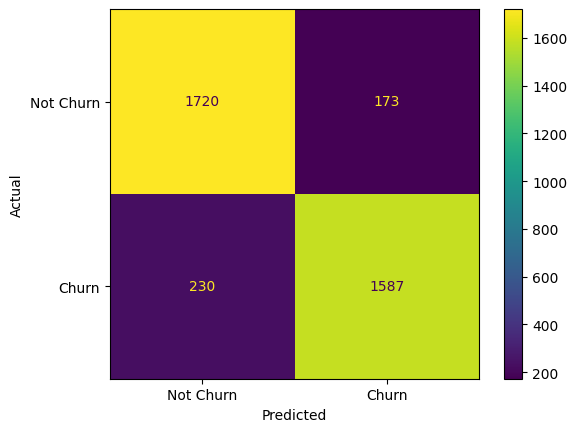

In [ ]:
cm_display.plot()
cm_display.ax_.set(xlabel='Predicted', ylabel='Actual')
plt.show()

# Conclusion
It was found that there were two models that predicted customer churn. The first was a logistic model that achieved a 79.27% accuracy rate. The other model was a random forest model which achieved an 89.41% accuracy rate. This model can be used by inputing values of current cursomers to predict if they would churn. This would help a company so that they know if they should put assets towards that customer or not. The model could be improved by adding more data lines to gain accuracy.